[PCCP 모의고사 #1] 1번 - [외톨이 알파벳](https://school.programmers.co.kr/learn/courses/20847/lessons/255900?language=python3)

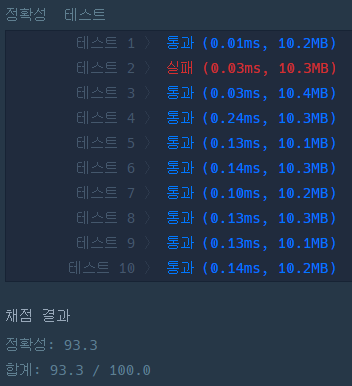

In [70]:
def solution(input_string):
    # shortcut 1 : 한 글자인 경우
    if len(input_string)==1:
        return 'N'
    
    unique_alphas = sorted(set(input_string))
    
    # shortcut 2 : 전체 알파벳의 개수와 문자열의 길이가 같은 경우
    if len(unique_alphas) == len(input_string):
        return 'N'
    elif len(unique_alphas) == 1:
        return 'N'
    
    answer = ''
    values = {key: 0 for key in unique_alphas}
    
    input_list = list(input_string)
    before = input_list.pop()
    values[before] += 1
    for _ in range(len(input_string)-1):
        char = input_list.pop()            
        if (before != char) and (values[char] > 0):
            answer += char
        values[char] += 1
        before = char
            
    answer = ''.join(sorted(set(answer)))
    
    return answer

In [71]:
solution('aaa')

'N'

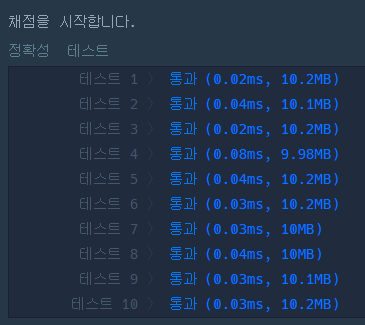

- 발상을 전환해서 굳이 떨어져있는 것을 일일히 찾기보다, 뭉쳐있는 게 존재하는지를 한 번에 찾는 식으로 진행

In [ ]:
def solution(input_string):
    unique_chars = sorted(set(input_string))
    targets = {char: input_string.count(char) for char in unique_chars}
    answer = ''
    for target in targets.keys():
        if target*targets[target] not in input_string:
            answer += target     
    
    return answer if answer != '' else 'N'

In [63]:
solution('aabcacb')

'abc'

[PCCP 모의고사 #1] 2번 - [체육대회](https://school.programmers.co.kr/learn/courses/20847/lessons/255901)

In [21]:
from itertools import combinations, permutations

def generate_combinations(n, m):
    return list(combinations(range(n), m))

# 예시 사용법
n = 5  # n까지의 숫자
m = 3  # 뽑을 조합의 수
combs = generate_combinations(n, m)
print(combs)


[(0, 1, 2), (0, 1, 3), (0, 1, 4), (0, 1, 5), (0, 2, 3), (0, 2, 4), (0, 2, 5), (0, 3, 4), (0, 3, 5), (0, 4, 5), (1, 2, 3), (1, 2, 4), (1, 2, 5), (1, 3, 4), (1, 3, 5), (1, 4, 5), (2, 3, 4), (2, 3, 5), (2, 4, 5), (3, 4, 5)]


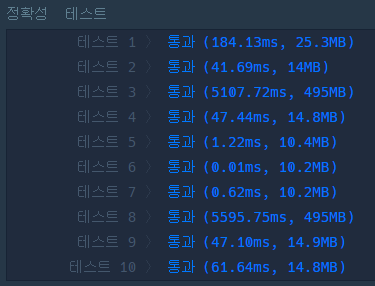

- permutations를 이용해 모든 조합을 한 번에 생성하고, 모든 조합에 대한 능력치 합을 계산
- 전수조사를 하기 때문에 데이터양이 커질수록 비효율적, 만약 실행속도 기준이 있었다면 위 기준으로 최소 2개는 탈락했을 것

In [25]:
from itertools import permutations

def generate_permutations(n, m):
    return list(permutations(range(n), m))

def solution(ability):
    
    answer = -1
    combi = generate_permutations(len(ability), len(ability[0]))
    
    for c in combi:
        score = 0
        for i in range(len(c)):
            score += ability[c[i]][i]
        if score > answer:
            answer = score        
            
    return answer

In [40]:
ability = [[40, 10, 10], [20, 5, 0], [30, 30, 30], [70, 0, 70], [100, 100, 100]]
solution(ability)

[(0, 1, 2), (0, 1, 3), (0, 1, 4), (0, 2, 1), (0, 2, 3), (0, 2, 4), (0, 3, 1), (0, 3, 2), (0, 3, 4), (0, 4, 1), (0, 4, 2), (0, 4, 3), (1, 0, 2), (1, 0, 3), (1, 0, 4), (1, 2, 0), (1, 2, 3), (1, 2, 4), (1, 3, 0), (1, 3, 2), (1, 3, 4), (1, 4, 0), (1, 4, 2), (1, 4, 3), (2, 0, 1), (2, 0, 3), (2, 0, 4), (2, 1, 0), (2, 1, 3), (2, 1, 4), (2, 3, 0), (2, 3, 1), (2, 3, 4), (2, 4, 0), (2, 4, 1), (2, 4, 3), (3, 0, 1), (3, 0, 2), (3, 0, 4), (3, 1, 0), (3, 1, 2), (3, 1, 4), (3, 2, 0), (3, 2, 1), (3, 2, 4), (3, 4, 0), (3, 4, 1), (3, 4, 2), (4, 0, 1), (4, 0, 2), (4, 0, 3), (4, 1, 0), (4, 1, 2), (4, 1, 3), (4, 2, 0), (4, 2, 1), (4, 2, 3), (4, 3, 0), (4, 3, 1), (4, 3, 2)]


210

In [27]:
ability = [[20, 30], [30, 20], [20, 30]]
solution(ability)

[(0, 1), (0, 2), (1, 0), (1, 2), (2, 0), (2, 1)]


60

- 아래와 같이 shortcut을 추가해서, 사전에 filtering되는 경우의 수를 추가했으나 해당 케이스에서는 별 효과가 없음

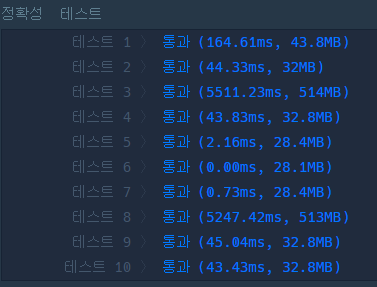

In [1]:
from itertools import permutations
import numpy as np

def generate_permutations(n, m):
    return list(permutations(range(n), m))

def solution(ability):
    
    answer = -1
    
    # shortcut
    if len(ability) == 1: # 한 명인 경우
        return max(ability[0])
    elif len(ability[0]) == 1: # 종목이 하나인 경우
        return max(ability)[0]
    
    ability2 = np.array(ability).T
    indexes = []
    score = 0
    for i, a in enumerate(ability2):
        max_score = a.max()
        max_index = np.where(a==max_score)
        indexes += max_index[0].tolist()
        score += max_score
    indexes = set(indexes)
    if len(indexes) == len(ability2): # 종목별 최고 점수 보유자가 다른 경우
        return score
        
        
    combi = generate_permutations(len(ability), len(ability[0]))
    
    for c in combi:
        score = 0
        for i in range(len(c)):
            score += ability[c[i]][i]
        if score > answer:
            answer = score        
            
    return answer

In [2]:
ability = [[40, 10, 10], [20, 5, 0], [30, 30, 30], [70, 0, 70], [70, 100, 100]]
solution(ability)

210

In [3]:
# 임의의 큰 사이즈 행렬로 성능 테스트
ability = np.random.randint(0,10000, (10,10)).tolist()

In [4]:
%%timeit -n 5 -t 5
solution(ability)

2.51 s ± 20.6 ms per loop (mean ± std. dev. of 7 runs, 5 loops each)


- 조사해본 결과 이러한 할당문제를 해결하기 위해 헝가리안 알고리즘이 존재하며, scipy를 통해 구현 가능
  (but 프로그래머스 문제 풀이에서는 scipy import가 불가능)
- 문제에서 제시된 가장 큰 사이즈의 ability 행렬로 성능 테스트 -> 아주 미세하게 성능이 더 높지만 적어도 주어진 조건 하에서 분명하게 효과적인지는 잘 모르겠음

In [5]:
from scipy.optimize import linear_sum_assignment

def solution_with_hungarian(ability):
    # ability 배열의 최대값을 찾아서 모든 값을 최대값에서 빼줌으로써 문제를 최소화 문제로 변환
    max_value = max(max(row) for row in ability)
    cost_matrix = [[max_value - ability_value for ability_value in row] for row in ability]
    
    # scipy의 linear_sum_assignment 함수를 사용하여 최소 비용 문제를 해결
    row_ind, col_ind = linear_sum_assignment(cost_matrix)
    
    # 할당된 작업에 대한 최대 능력치의 합을 계산
    max_ability_sum = sum(ability[row][col] for row, col in zip(row_ind, col_ind))
    
    return max_ability_sum

In [6]:
%%timeit -n 5 -t 5
solution(ability)

2.44 s ± 29.5 ms per loop (mean ± std. dev. of 7 runs, 5 loops each)


[PCCP 모의고사 #1] 3번 - [유전법칙](https://school.programmers.co.kr/learn/courses/20847/lessons/255902)

- 최대 세대까지의 값을 사전에 모두 계산해놓는 경우 : query가 많을 경우엔 효율적이나 세대가 깊을수록 비효율적

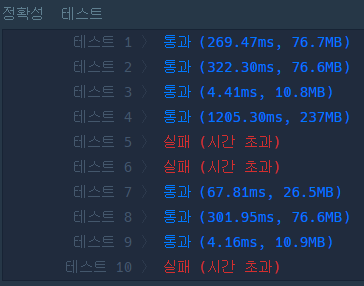

In [93]:
def pea_trait(pea):
    rule = {'a':'aaaa', 'b':'abbc', 'c':'cccc'}
    answer = "".join([rule[p] for p in pea])
    return answer

def solution(queries):
    answers = []
    
    max_gen = max([query[0] for query in queries])
    gens = ['b']
    before = 'b'
    for _ in range(max_gen-1):
        new = [pea_trait(x) for x in before]
        gens.append(new[0])
        before = new
    
    answer_map = {'a':'RR', 'b':'Rr', 'c':'rr'}
    for query in queries:
        n = query[0]
        if n == 1:
            answers.append("Rr")
            continue
        answer = answer_map[gens[query[0]-1][query[1]-1]]
        answers.append(answer)
    return answers

- 재귀적으로 푸는 경우
: query의 숫자가 많이 않을 경우엔 이게 더 효율적

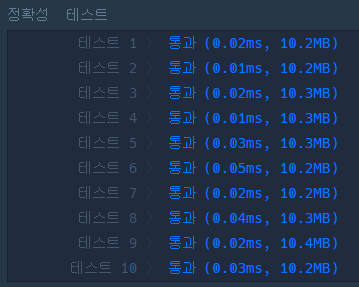

In [ ]:
def solution(queries):
    # 이 함수는 완두콩 가계도에서 n세대 p번째 완두콩의 형질을 계산합니다.

    def offspring_traits(parent_trait):
        # 부모의 형질이 주어졌을 때 가능한 후손의 형질을 반환합니다.
        if parent_trait == 'RR':
            # 순종 둥근 완두(RR)는 둥근 완두 형질만을 낳습니다.
            return ['RR'] * 4
        elif parent_trait == 'rr':
            # 순종 주름진 완두(rr)는 주름진 완두 형질만을 낳습니다.
            return ['rr'] * 4
        else:
            # 잡종 완두(Rr)는 1 RR, 2 Rr, 1 rr 을 낳습니다.
            return ['RR', 'Rr', 'Rr', 'rr']

    def find_trait(gen, position):
        # 주어진 세대(gen)와 위치(position)에서 완두콩의 형질을 재귀적으로 찾습니다.

        # 기본 경우: 첫 번째 세대에서는 모든 완두콩의 형질이 Rr입니다.
        if gen == 1:
            return 'Rr'

        # 이전 세대에서 완두콩의 부모의 위치를 결정합니다.
        parent_position = (position - 1) // 4 + 1

        # 부모의 형질을 얻습니다.
        parent_trait = find_trait(gen - 1, parent_position)

        # 후손의 가능한 형질 목록을 가져옵니다.
        traits = offspring_traits(parent_trait)

        # 후손의 형질 인덱스를 찾습니다.
        index_in_traits = (position - 1) % 4

        # 해당하는 후손의 형질을 반환합니다.
        return traits[index_in_traits]

    # 각 쿼리에 대한 형질을 계산합니다.
    traits = [find_trait(n, p) for n, p in queries]

    return traits

- 세대 내 위치를 이용해 어디서 파생됐는지를 역추적

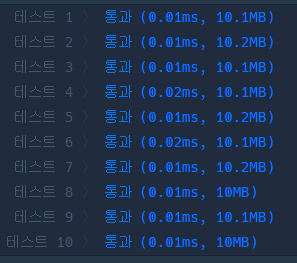

In [136]:
def get_gene(pose):
    n,p = pose # 세대, 번째
    stack = []
    p -= 1

    while n > 1:
        stack.append(p%4)
        n -= 1
        p //= 4
    print(stack)
    while len(stack) > 0:
        num = stack.pop()
        if num == 0: return "RR"
        elif num == 3: return "rr"
    return "Rr"

def solution(queries):
    return [*map(get_gene,queries)]

In [138]:
solution([[3, 6]])

[1, 1]


['Rr']

In [102]:
solution([[1, 1]])

['Rr']

In [103]:
solution([[3, 5]])

IndexError: list index out of range

In [97]:
solution([[3, 8]])

['rr']

In [98]:
solution([[3, 8], [2, 2]])

['rr', 'Rr']

In [99]:
solution([[3, 1], [2, 3], [3, 9]])

['RR', 'Rr', 'RR']

In [100]:
solution([[4, 26]])

['Rr']